<center><h1>Autoencoder on SR2 </h1>
John Ignacio R.M. Oct 2020</center>

In [1]:
# Ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset, filter_signal_class
from ada.model import AutoencoderModel1 as A1, AutoencoderModelForTuning as AT, AutoencoderModel2 as A2
from ada.plot import plot_confidence_matrix
import pandas as pd
from os.path import exists

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
# Constants
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420
region = "SR"
tag = 2

In [3]:
# Read dataset
df = read_dataset(source_path, signal, bg, region, tag)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


# A1 (original model) on Xtohh2000 SR2

In [4]:
# Splitting dataset
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)

In [5]:
# Getting data from signal
signal_sets = filter_signal_class(sets)

In [6]:
model = A1(signal_sets["x_train_1"].shape[1], 0)
model.fit(signal_sets["x_train_1"],signal_sets["w_train_1"], signal_sets["x_val_1"], signal_sets["w_val_1"], 100)

Train on 5123 samples, validate on 1721 samples
Epoch 1/100
5123/5123 [==============================] - 1s 140us/step - loss: 0.0011 - val_loss: 9.6762e-04
Epoch 2/100
5123/5123 [==============================] - 0s 65us/step - loss: 0.0010 - val_loss: 9.5697e-04
Epoch 3/100
5123/5123 [==============================] - 0s 69us/step - loss: 0.0010 - val_loss: 9.5623e-04
Epoch 4/100
5123/5123 [==============================] - 0s 63us/step - loss: 0.0010 - val_loss: 9.5245e-04
Epoch 5/100
5123/5123 [==============================] - 0s 69us/step - loss: 9.9973e-04 - val_loss: 9.5080e-04
Epoch 6/100
5123/5123 [==============================] - 0s 59us/step - loss: 9.9537e-04 - val_loss: 9.4792e-04
Epoch 7/100
5123/5123 [==============================] - 0s 73us/step - loss: 9.9277e-04 - val_loss: 9.4778e-04
Epoch 8/100
5123/5123 [==============================] - 0s 63us/step - loss: 9.9494e-04 - val_loss: 9.4483e-04
Epoch 9/100
5123/5123 [==============================] - 0s 65us/step -

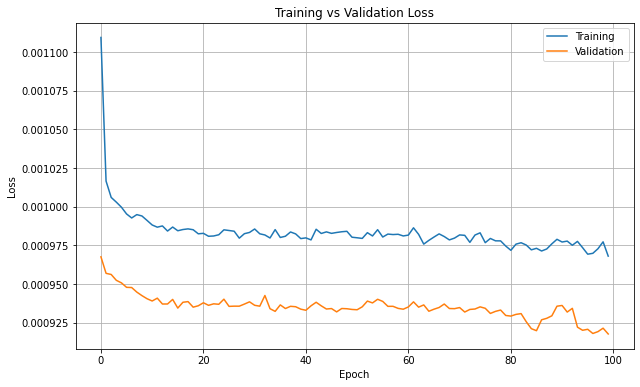

In [7]:
model.plot_loss()

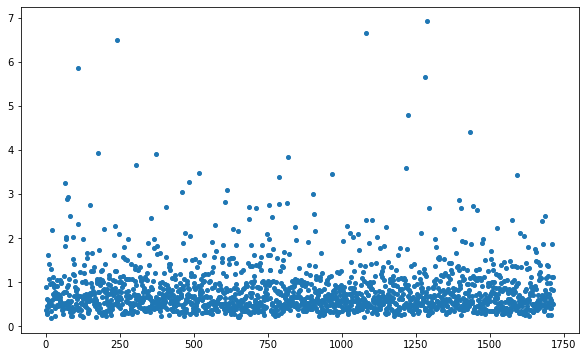

In [8]:
model.plot_errors(signal_sets["x_test_1"])

In [9]:
model.error_wavg_std(signal_sets["x_test_1"], signal_sets["w_test_1"])

(0.8156874737305997, 0.6071330816356946)

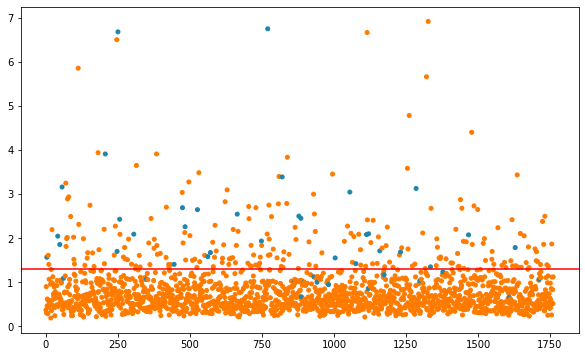

In [10]:
model.plot_reconstruction_error(sets["x"]["test"], sets["y"]["test"], 1.3)

In [11]:
model.save(dest_path, "SR2_Oct2020")

Accuracy: 0.8186862168543271


,0,1,macro avg,weighted avg
precision,0.470955,0.902142,0.686548,0.828810
recall,0.535970,0.876621,0.706295,0.818686
f1-score,0.501363,0.889198,0.695281,0.823239
support,0.397218,1.938392,2.335610,2.335610


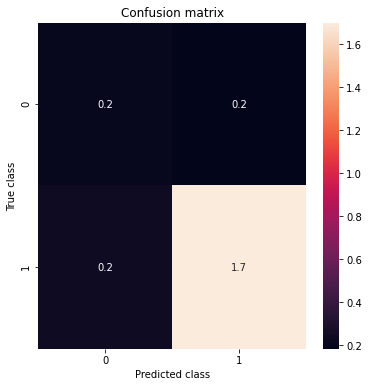

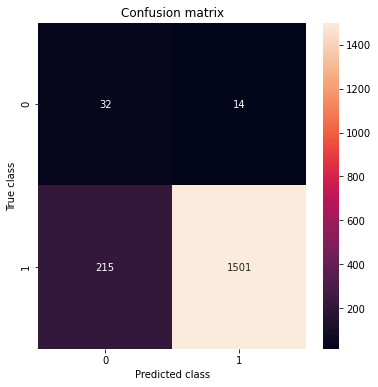

In [12]:
#eval_A1_SR2_Oct2020.json
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 1.3,
    save = True, name = "SR2_Oct2020", dest_path = "./scores"
)
print("Accuracy:", eval["weighted_accuracy"])
display(pd.DataFrame(eval["weighted_class_report"]))
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

# A2 on Xtohh2000 SR2

In [13]:
# Splitting dataset
sets2 = split_dataset(df, 0.5, 0.3, 0.2, seed)

In [14]:
# Getting data from signal
signal_sets2 = filter_signal_class(sets2)

In [15]:
model2 = A2(signal_sets2["x_train_1"].shape[1], 0)
model2.fit(signal_sets2["x_train_1"],signal_sets2["w_train_1"], signal_sets2["x_val_1"], signal_sets2["w_val_1"], 100)

Train on 3890 samples, validate on 2954 samples
Epoch 1/100
3890/3890 [==============================] - 1s 136us/step - loss: 0.0011 - val_loss: 9.6759e-04
Epoch 2/100
3890/3890 [==============================] - 0s 73us/step - loss: 0.0010 - val_loss: 9.4131e-04
Epoch 3/100
3890/3890 [==============================] - 0s 77us/step - loss: 0.0010 - val_loss: 9.3712e-04
Epoch 4/100
3890/3890 [==============================] - 0s 79us/step - loss: 0.0010 - val_loss: 9.3827e-04
Epoch 5/100
3890/3890 [==============================] - 0s 96us/step - loss: 0.0010 - val_loss: 9.3159e-04
Epoch 6/100
3890/3890 [==============================] - 0s 73us/step - loss: 0.0010 - val_loss: 9.3197e-04
Epoch 7/100
3890/3890 [==============================] - 0s 76us/step - loss: 9.9962e-04 - val_loss: 9.3586e-04
Epoch 8/100
3890/3890 [==============================] - 0s 73us/step - loss: 0.0010 - val_loss: 9.3578e-04
Epoch 9/100
3890/3890 [==============================] - 0s 94us/step - loss: 9.964

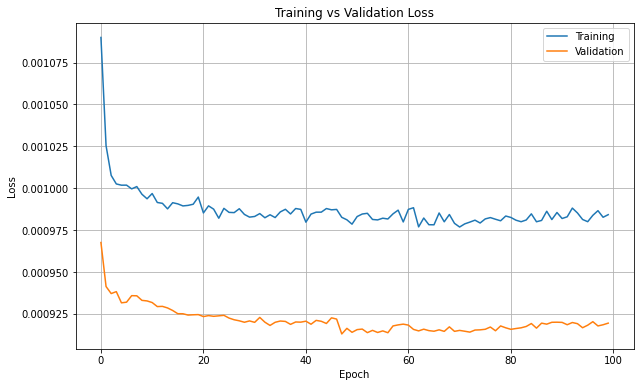

In [16]:
model2.plot_loss()

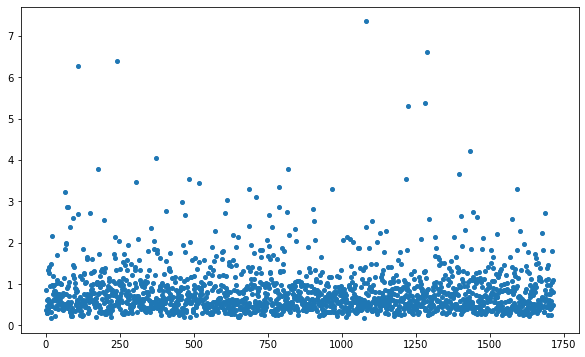

In [17]:
model2.plot_errors(signal_sets2["x_test_1"])

In [18]:
model2.error_wavg_std(signal_sets2["x_test_1"], signal_sets2["w_test_1"])

(0.8318620299768298, 0.6227297333576586)

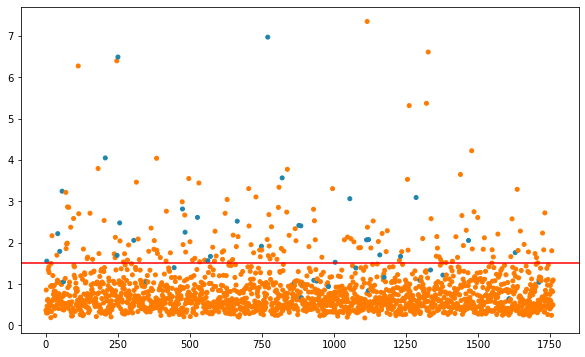

In [19]:
model2.plot_reconstruction_error(sets2["x"]["test"], sets2["y"]["test"], 1.5)

Accuracy: 0.834898666396282


,0,1,macro avg,weighted avg
precision,0.515533,0.895710,0.705622,0.831053
recall,0.484872,0.906627,0.695749,0.834899
f1-score,0.499733,0.901135,0.700434,0.832869
support,0.397218,1.938392,2.335610,2.335610


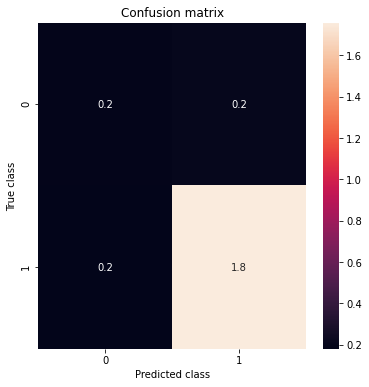

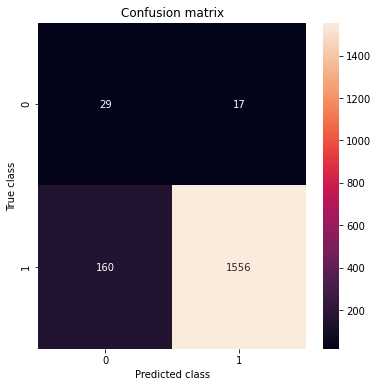

In [20]:
#eval_A2_SR2_Oct2020.json
eval2 = model2.complete_evaluation(
    sets2["x"]["test"], sets2["y"]["test"], sets2["w"]["test"], 1.5,
    save = True, name = "SR2_Oct2020", dest_path = "./scores"
)
print("Accuracy:", eval2["weighted_accuracy"])
display(pd.DataFrame(eval2["weighted_class_report"]))
plot_confidence_matrix(eval2["weighted_cm"], 6, 6, '.1f')
plot_confidence_matrix(eval2["cm"], 6, 6, 'd')

In [21]:
model2.save(dest_path, "SR2_Oct2020")

# Tuning

In [ ]:
# Idea: tuning but instead of measuring with testing error, doing it with f1 score after reconstruction uwu

In [5]:
# Tunning of hyperparameters
lrs = [5e-3, 1e-2, 5e-2, 1e-1]
from keras.optimizers import adam, adadelta, adagrad, adamax
optis = [adam, adadelta, adagrad, adamax]

splits = [
    (0.6, 0.2, 0.2), (0.5, 0.3, 0.2), #80:20
    (0.5, 0.2, 0.3), (0.4, 0.3, 0.3), #70:30
    (0.4, 0.2, 0.4), (0.3, 0.3, 0.4), #60:40
]

sets = [filter_signal_class(split_dataset(df, *split, seed)) for split in splits]

combs = [(sets[i], splits[i], opti, lr) for i in range(len(splits))
                                                        for lr in lrs
                                                            for opti in optis]
len(combs)

96

In [8]:
def autoencoder_error(Autoencoder, sets, split, optimizer, lr, comb_id, epochs, dest_path, title):
    print(f"Training comb {comb_id}:", split, optimizer, lr)
    model = Autoencoder(sets["x_train_1"].shape[1], 0, optimizer, lr)
    if not exists (f"{dest_path}/{model.model_name}_{title}_comb{comb_id}.h5"):
        model.fit(sets["x_train_1"],sets["w_train_1"], sets["x_val_1"], sets["w_val_1"], epochs, verbose = 0)
        model.save(dest_path, f"{title}_comb{comb_id}")
    else:
        model.load(dest_path, f"{title}_comb{comb_id}")
    return model.error_wavg_std(sets["x_test_1"], sets["w_test_1"])

def autoencoder_error_per_comb(Autoencoder, combs, epochs, dest_path, title):
    n_combs = len(combs)
    error_per_comb = [(i, *autoencoder_error(AT, *combs[i], i, epochs, dest_path, title)) for i in range(n_combs)]
    return pd.DataFrame(error_per_comb, columns =['comb', 'wavg', 'wstd']) 

In [10]:
errors_df = autoencoder_error_per_comb(AT, combs, 100, "../../saved_models/tuningATxtohh2000", "SR2")

Training comb 0: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adam'> 0.005
Training comb 1: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adadelta'> 0.005
Training comb 2: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adagrad'> 0.005
Training comb 3: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adamax'> 0.005
Training comb 4: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adam'> 0.01
Training comb 5: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adadelta'> 0.01
Training comb 6: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adagrad'> 0.01
Training comb 7: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adamax'> 0.01
Training comb 8: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adam'> 0.05
Training comb 9: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adadelta'> 0.05
Training comb 10: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adagrad'> 0.05
Training comb 11: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adamax'> 0.05
Training comb 12: (0.6, 0.2, 0.2) <class 'keras.optimizers.Adam'> 0.1
Training comb 13: (0.6, 0.2, 0.2) <class 'keras.optimizer

In [13]:
errors_df.nsmallest(10, ["wavg"])

,comb,wavg,wstd
27,27,0.777132,0.580158
16,16,0.777294,0.580234
95,95,0.777588,0.620405
31,31,0.778607,0.556305
26,26,0.781817,0.579407
30,30,0.783584,0.580527
10,10,0.785994,0.570510
46,46,0.786161,0.583493
11,11,0.786827,0.571733
14,14,0.787629,0.571204


In [14]:
errors_df.nsmallest(10, ["wstd"])

,comb,wavg,wstd
31,31,0.778607,0.556305
10,10,0.785994,0.570510
14,14,0.787629,0.571204
68,68,0.797128,0.571461
11,11,0.786827,0.571733
79,79,0.808544,0.574398
43,43,0.789024,0.578400
26,26,0.781817,0.579407
64,64,0.799306,0.579854
27,27,0.777132,0.580158


# Comb 31

In [15]:
combs[31][1:]

((0.5, 0.3, 0.2), keras.optimizers.Adamax, 0.1)

In [18]:
sets31 = combs[31][0]
model31 = AT(sets31["x_train_1"].shape[1], 0, adagrad, 0.1)
model31.load("../../saved_models/tuningATxtohh2000", f"SR2_comb31")

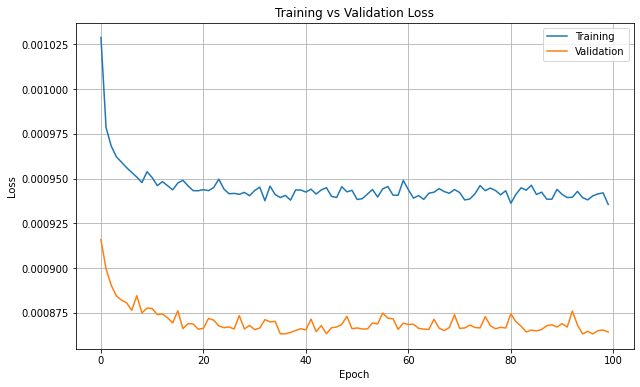

In [19]:
model31.plot_loss()

In [20]:
model31.error_wavg_std(sets31["x_test_1"], sets31["w_test_1"])

(0.7786072866765936, 0.5563054937755249)

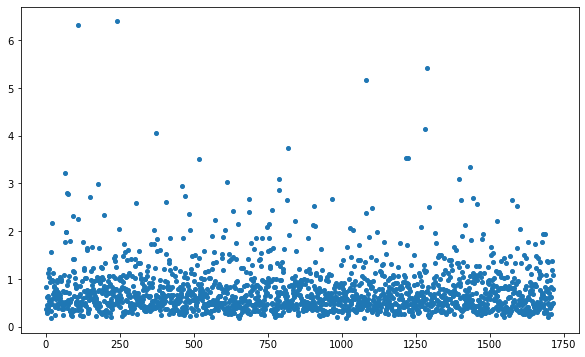

In [22]:
model31.plot_errors(sets31["x_test_1"])